<a href="https://colab.research.google.com/github/JihoonYun/STAT5010/blob/main/Homework2_Jihoon_yun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Hypothesis Testing and Simple Linear Regression
***

**Name**:

***

This assignment is due on Gradescope by **Friday February 16 at 5:59PM**. If you submit the assignment  by this deadline, you will receive 5 bonus points. If you need a little extra time, you may submit your work by **Monday February 19 at 5:59PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**:

- There are 2 total questions on this assignment.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.



---

---


### Problem 1 - Hypothesis Testing with Randomization (25 points)

For this problem, we will be performing a hypothesis test with randomization.

The Stanford University Heart Transplant Study was conducted to determine whether an experimental heart transplant program increased lifespan. Each patient entering the program was designated an official heart transplant candidate, meaning that they were gravely ill and would most likely benefit from a new heart. Some patients got a transplant and some did not. The variable `transplant` indicates which group the patients were in; patients in the treatment group got a transplant and those in the control group did not. Of the 34 patients in the control group, 30 died. Of the 69 people in the treatment group, 45 died. Another variable called `survived` was used to indicate whether or not the patient was alive at the end of the study.

![bargraph-problem1.png](attachment:e4098c96-8378-4796-b326-e79f9a32fcf5.png)
[link text](https://piazza.com/redirect/s3?bucket=uploads&prefix=paste%2Fjkck4qju4il6et%2F960d182b329a0e70d68b38a1bef0d14dbd4b8627a951a014deccc258ce903327%2FScreenshot_2024-02-11_at_8.33.02_AM.png)

**Part A**: Does the stacked bar plot indicate that survival is independent of whether or not the patient got a transplant? Explain your reasoning?

The difference in survival rates between the **Control** and **Treatment** groups in the stacked bar plot suggests a potential association between survival and transplant status. However, even if there is an approximate **23%** difference in survival rates between the two groups, **it is difficult to conclusively determine the relationship between transplant status and survival.** It is necessary to conduct additional statistical tests to determine whether the observed difference is due to chance or if it genuinely reflects a relationship between transplant status and survival.

**Part B:** What do the box plots above suggest about the efficacy (effectiveness) of the heart transplant treatment?

The box plots indicate that **the survival time in the Treatment group is considerably higher than that in the Control group**. Particularly, the upper quartiles and maximum values in the Treatment group's box plot are much larger than those in the Control group's. This suggests strong evidence that **heart transplant treatment can significantly improve survival time**.

**Part C:** What proportion of patients in the treatment group and what proportion of patients in the control group died?

To calculate the proportion of patients who died in each group, we divide the number of deaths by the total number of patients in each group and multiply by 100 to express it as a percentage.

**For the control group:**  
*   *Number of deaths* = 30
*   *Total number of patients* = 34
*   *Proportion of patients who died in the control group* =
$\frac{30}{34} × 100 ≈ 88.2\%$
  

**For the treatment group:**  
*   *Number of deaths* = 45
*   *Total number of patients* = 69
*   *Proportion of patients who died in the treatment group* =
$\frac{45}{69} × 100 ≈ 65.2\%$  

So, approximately **88.2%** of **patients in the control group died**, while approximately **65.2%** of **patients in the treatment group died**.

**Part D:** Now we will perform a hypothesis test using randomization. State the null and alternative hypotheses for the test.

The null hypothesis (H0) typically starts with a basic assumption in an experiment. This assumes that there is no difference between the two groups, so in this case, the null hypothesis is that the survival rate is the same between patients who received a transplant and those who did not. The alternative hypothesis (H1) is the hypothesis that disproves the null hypothesis, which in this case is that the survival rate is different between patients who received a transplant and those who did not. Therefore, the null and alternative hypotheses can be formulated as follows:  
  
*  **Null hypothesis (H0)**: The survival rate is the same between patients who received a transplant and those who did not.  
*  **Alternative hypothesis (H1)**: The survival rate is different between patients who received a transplant and those who did not receive a transplant.

**Part E:** Run 1000 simulations for a randomization test and compile the results in a histogram. Display your histogram below. Please see pages 215-216 in "Introduction to Modern Statistics" as a reference for this. Note that this problem is taken directly from the textbook. We are trying to see if we can replicate the results. Due to random sampling, it is expected that your histograms should be slightly different from the textbook and from each other.

Note, you will need to create synthetic data. There were $34+69 = 103$ Total people in this study. You will need to create a process for labeling the data points as "survivor" or "non-survivor" and making random draws from this labeled data. Hint: You could make a list or a csv file with this data and then sample it randomly. Or you could compute the rate of survivors vs non-survivors within these 103 data values and simulate the data using the survival rate as a probability distribution. Or you could come up with your own process. The first way I described it a bit closer to the classic set up we have been discussing in class. But I think the second way is a reasonable approximation. Either is fine for the sake of this homework assignment.

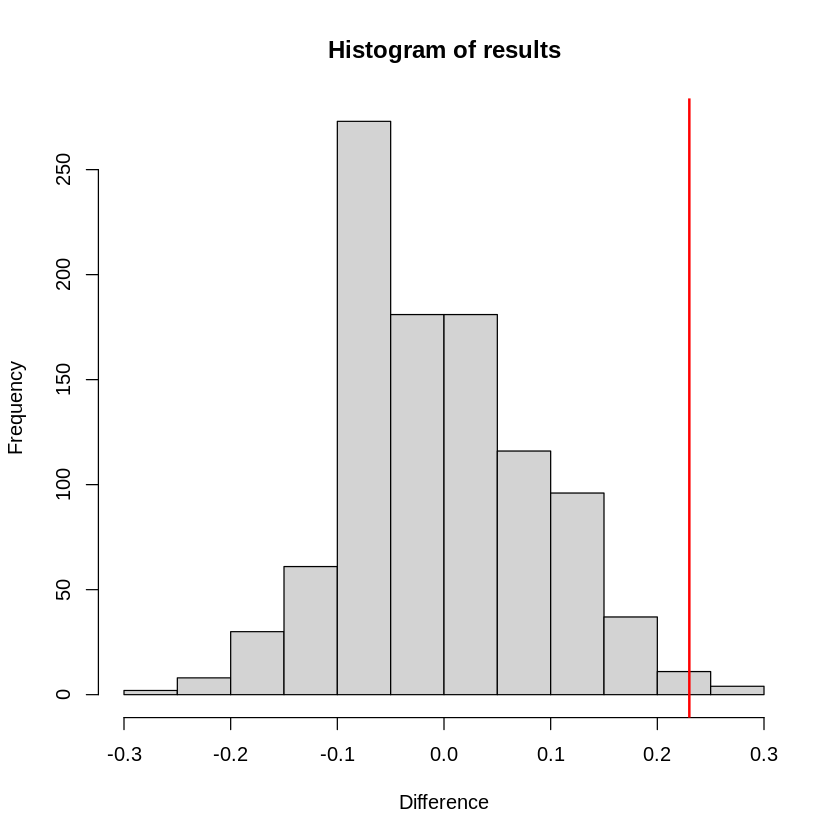

In [ ]:
alive_patients <- rep("survivor", 28)
dead_patients <- rep("non-survivor", 75)

all_patients <- c(alive_patients, dead_patients)
num_simuls <- 1000
results <- numeric(num_simuls)

for (i in 1:num_simuls) {
  shuffled_patients <- sample(all_patients)
  treatment_group <- shuffled_patients[1:69]
  control_group <- shuffled_patients[70:103]

  treatment_dead_proportion <- sum(treatment_group == "non-survivor") / length(treatment_group)
  control_dead_proportion <- sum(control_group == "non-survivor") / length(control_group)

  observed_diff <- treatment_dead_proportion - control_dead_proportion

  results[i] <- observed_diff
}

hist(results, xlab = "Difference", ylab = "Frequency")
abline(v = 0.23, col = "red", lwd = 2)


We generate data for 103 patients labeled as "survivor" and "non-survivor". Out of these, 28 are labeled as "survivor" representing patients who survived, and 75 are labeled as "non-survivor" representing patients who did not survive.
We perform 1000 simulations to compute the difference in survival rates between patients who received a transplant (treatment group) and those who did not (control group). In each simulation, we shuffle the labels of the patients randomly and divide them into two groups: one representing patients who received a transplant and the other representing patients who did not. We then calculate the proportion of patients who died in each group.
We calculate the difference in the proportions of patients who died between the treatment group and the control group for each simulation and store these differences in a vector. Using the stored results, we draw a histogram representing the distribution of differences in survival rates. We also mark a vertical line representing the observed difference of approximately 0.23 between the control group and the treatment group.

**Part F:** What is your conclusion and why? (In other words, will you reject your null hypothesis or fail to reject your null hypothesis?)

The null hypothesis (H0) assumes that there is no difference in survival rates between patients who received a heart transplant and those who did not, while the alternative hypothesis (H1) suggests that there is a difference in survival rates between the two groups.

According to the given information, the actual difference in survival rates between the group that received a heart transplant and the group that did not is 0.23, and the approximate height of the histogram bar representing this difference is around 30. This represents the distribution obtained from 1000 simulations. That is, it accounts for about 3% of the total samples since the height of the histogram bar is 30. This is smaller than the usual significance level (alpha) of 0.05. Therefore, the null hypothesis is rejected. When the null hypothesis is rejected, the alternative hypothesis is accepted. Thus, it can be concluded from the given data that there is a statistically significant difference in survival rates between the two groups.

---


### Problem 2 - Simple Linear Regression (25 points)

For this problem, we will be performing simple linear regression using the following dataset:
`Fish.csv`

Information about this data from the original source (kaggle): "This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted."

**Response**:
- Weight (in grams)

**Features**:
- Length1 (vertical length in cm)
- Length2 (diagonal length in cm)
- Length3 (cross length in cm)
- Height (in cm)
- Width (diagonal width in cm)

The species name of the fish is also given.

**Part A**: Read the data from the csv into a DataFrame.  If you are reading in `Fish.csv`, I would recommend dropping the species column as it is non-numerical.

Also, make sure to re-order the columns so that the response variable is the last column.

**Part B:** Make separate scatter plots for each feature versus the response. From these plots, we will try and make inferences about which features appear to have a relationship with the response variable. Write a brief summary of what you notice in each plot. Do you notice any trends in the data?

**Part C:** Use your favorite method in R to fit simple linear regression models to the data. Fit a separate SLR model for each feature.


Once you have fit each model, report the following information about each model:
- intercept value
- slope value
- p-value

**Part D:** Use the SLR model from **Part C** for $\texttt{Length3}$ versus $\texttt{Weight}$ to estimate the weight of a fish whose measurement for $\texttt{Length3}=31$ cm.

**Part E:** Looking at all 5 SLR models from **Part C**, what do you notice about the p-values? What inferences could you make from this information.

**Part F:(BONUS)** Not required. If you complete this portion, it is worth 3 bonus points towards your score on this assignment.

Now, let's fit a multiiple linear regression model!

Explicitly write out the MLR model using the coefficients that you found so that you have an answer of the form:
$$ \hat{y} = \beta_0+\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 $$